In [1]:
# install libraries if not already installed, uncomment the following lines

import sys
# !{sys.executable} -m pip install opencv-python opencv-contrib-python matplotlib numpy torch torchvision pandas tqdm scikit-learn seaborn

In [2]:
import torchvision.transforms as transforms
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch


In [3]:
from src import dataloader as ds
from src import models as m
from src import training as t
from src import evaluation as eval


In [4]:
file_path = 'fer2013.tar.gz'
data_path = ds.unpack_tar_gz(file_path)

Target folder 'data' is not empty. Assuming the file is already unpacked.


In [5]:
# dataset is available at https://www.kaggle.com/datasets/ashishpatel26/facial-expression-recognitionferchallenge
df = pd.read_csv(data_path)
print(df.shape)
df.head()

(35887, 3)


,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [6]:
emotion_label = {0: 'anger', 1: 'disgust', 2: 'fear', 3: 'happiness', 4: 'sadness', 5: 'surprise', 6: 'neutral'}

In [7]:
df_mapped = df.copy()

# Map the emotion labels to their names
df_mapped['emotion'] = df_mapped['emotion'].map(emotion_label)

In [8]:
df_mapped.head()

,emotion,pixels,Usage
0,anger,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,anger,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,fear,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,sadness,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,neutral,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [9]:
df_mapped['Usage'].value_counts()

Usage
Training       28709
PublicTest      3589
PrivateTest     3589
Name: count, dtype: int64

In [10]:
df_mapped['emotion'].value_counts()

emotion
happiness    8989
neutral      6198
sadness      6077
fear         5121
anger        4953
surprise     4002
disgust       547
Name: count, dtype: int64

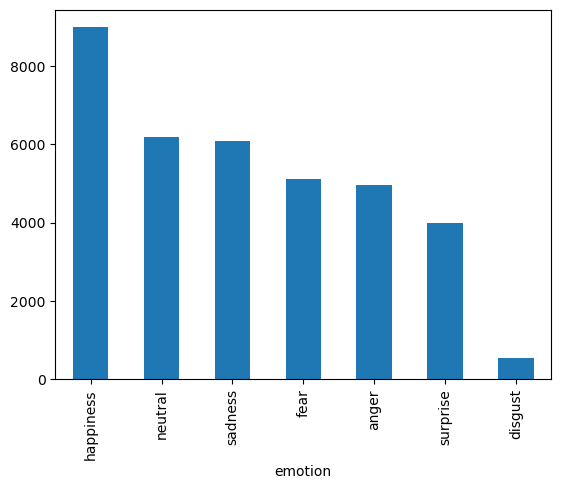

In [11]:
# plot the distribution of the emotions
df_mapped['emotion'].value_counts().plot(kind='bar')
plt.show()

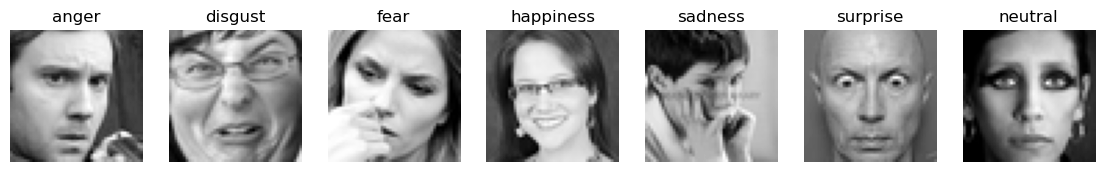

In [12]:
def pixels_to_image(pixels_str):
    pixels = np.fromstring(pixels_str, dtype=int, sep=' ')
    image = pixels.reshape(48, 48)
    return image


# plot each emotion
fig, axes = plt.subplots(1, 7, figsize=(14, 2))
for i in range(7):
    image = pixels_to_image(df[df['emotion'] == i].iloc[0]['pixels'])
    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(emotion_label[i])
    axes[i].axis('off')

plt.show()

In [13]:
train_transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomHorizontalFlip(p=0.5),  # Randomly flip the image horizontally
    transforms.RandomRotation(degrees=10),   # Randomly rotate the image by up to 10 degrees
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),  # Randomly change brightness, contrast, and saturation
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

batch_size = 64
train_loader, valid_loader, test_loader = ds.get_data_loaders(data_path, batch_size, train_transform)

Loaded 28709 samples for mode 'train'
Loaded 3589 samples for mode 'val'
Loaded 3589 samples for mode 'test'


Validation: 100%|██████████| 57/57 [00:01<00:00, 30.27it/s, Val Loss=0.0237, Accuracy=42]  


Epoch 1/20, Train Loss: 1.7160, Train Acc: 29.9314, Val Loss: 1.4891, Val Acc: 41.9894
Best model saved with accuracy: 41.9894 as 'bestmodels/SimpleCNN_CrossEntropyLoss_Adam_best_model.pth'


Validation: 100%|██████████| 57/57 [00:01<00:00, 30.52it/s, Val Loss=0.0206, Accuracy=50.3]


Epoch 2/20, Train Loss: 1.4133, Train Acc: 45.1914, Val Loss: 1.2983, Val Acc: 50.3483
Best model saved with accuracy: 50.3483 as 'bestmodels/SimpleCNN_CrossEntropyLoss_Adam_best_model.pth'


Validation: 100%|██████████| 57/57 [00:01<00:00, 28.64it/s, Val Loss=0.0197, Accuracy=52]  


Epoch 3/20, Train Loss: 1.3033, Train Acc: 50.2003, Val Loss: 1.2406, Val Acc: 51.9643
Best model saved with accuracy: 51.9643 as 'bestmodels/SimpleCNN_CrossEntropyLoss_Adam_best_model.pth'


Validation: 100%|██████████| 57/57 [00:01<00:00, 29.47it/s, Val Loss=0.0193, Accuracy=53.8]


Epoch 4/20, Train Loss: 1.2328, Train Acc: 52.9137, Val Loss: 1.2151, Val Acc: 53.7754
Best model saved with accuracy: 53.7754 as 'bestmodels/SimpleCNN_CrossEntropyLoss_Adam_best_model.pth'


Validation: 100%|██████████| 57/57 [00:02<00:00, 27.87it/s, Val Loss=0.0183, Accuracy=56.3]


Epoch 5/20, Train Loss: 1.1941, Train Acc: 54.7668, Val Loss: 1.1493, Val Acc: 56.3110
Best model saved with accuracy: 56.3110 as 'bestmodels/SimpleCNN_CrossEntropyLoss_Adam_best_model.pth'


Validation: 100%|██████████| 57/57 [00:01<00:00, 29.29it/s, Val Loss=0.0181, Accuracy=56.8]


Epoch 6/20, Train Loss: 1.1597, Train Acc: 56.2890, Val Loss: 1.1396, Val Acc: 56.8125
Best model saved with accuracy: 56.8125 as 'bestmodels/SimpleCNN_CrossEntropyLoss_Adam_best_model.pth'


Validation: 100%|██████████| 57/57 [00:02<00:00, 28.21it/s, Val Loss=0.0179, Accuracy=57]  


Epoch 7/20, Train Loss: 1.1283, Train Acc: 57.1424, Val Loss: 1.1293, Val Acc: 56.9797
Best model saved with accuracy: 56.9797 as 'bestmodels/SimpleCNN_CrossEntropyLoss_Adam_best_model.pth'


Validation: 100%|██████████| 57/57 [00:01<00:00, 29.24it/s, Val Loss=0.0177, Accuracy=57.6]


Epoch 8/20, Train Loss: 1.0995, Train Acc: 58.3058, Val Loss: 1.1122, Val Acc: 57.5648
Best model saved with accuracy: 57.5648 as 'bestmodels/SimpleCNN_CrossEntropyLoss_Adam_best_model.pth'


Validation: 100%|██████████| 57/57 [00:01<00:00, 29.26it/s, Val Loss=0.0178, Accuracy=57.3]


Epoch 9/20, Train Loss: 1.0808, Train Acc: 59.0094, Val Loss: 1.1231, Val Acc: 57.3140


Validation: 100%|██████████| 57/57 [00:01<00:00, 28.72it/s, Val Loss=0.0172, Accuracy=59.5]


Epoch 10/20, Train Loss: 1.0629, Train Acc: 59.6120, Val Loss: 1.0840, Val Acc: 59.4873
Best model saved with accuracy: 59.4873 as 'bestmodels/SimpleCNN_CrossEntropyLoss_Adam_best_model.pth'


Validation: 100%|██████████| 57/57 [00:02<00:00, 28.49it/s, Val Loss=0.0177, Accuracy=59]  


Epoch 11/20, Train Loss: 1.0412, Train Acc: 60.7684, Val Loss: 1.1157, Val Acc: 59.0137


Validation: 100%|██████████| 57/57 [00:01<00:00, 29.25it/s, Val Loss=0.0173, Accuracy=59.3]


Epoch 12/20, Train Loss: 1.0256, Train Acc: 61.0714, Val Loss: 1.0912, Val Acc: 59.3480


Validation: 100%|██████████| 57/57 [00:01<00:00, 29.48it/s, Val Loss=0.0171, Accuracy=59.8]


Epoch 13/20, Train Loss: 1.0108, Train Acc: 61.5765, Val Loss: 1.0755, Val Acc: 59.8217
Best model saved with accuracy: 59.8217 as 'bestmodels/SimpleCNN_CrossEntropyLoss_Adam_best_model.pth'


Validation: 100%|██████████| 57/57 [00:01<00:00, 29.64it/s, Val Loss=0.0173, Accuracy=59.5]


Epoch 14/20, Train Loss: 0.9990, Train Acc: 62.2348, Val Loss: 1.0864, Val Acc: 59.4873


Validation: 100%|██████████| 57/57 [00:01<00:00, 29.42it/s, Val Loss=0.0173, Accuracy=60.2]


Epoch 15/20, Train Loss: 0.9891, Train Acc: 62.2209, Val Loss: 1.0909, Val Acc: 60.2118
Best model saved with accuracy: 60.2118 as 'bestmodels/SimpleCNN_CrossEntropyLoss_Adam_best_model.pth'


Validation: 100%|██████████| 57/57 [00:01<00:00, 29.41it/s, Val Loss=0.017, Accuracy=60.5] 


Epoch 16/20, Train Loss: 0.9719, Train Acc: 63.3251, Val Loss: 1.0677, Val Acc: 60.4904
Best model saved with accuracy: 60.4904 as 'bestmodels/SimpleCNN_CrossEntropyLoss_Adam_best_model.pth'


Validation: 100%|██████████| 57/57 [00:01<00:00, 29.47it/s, Val Loss=0.0176, Accuracy=60.2]


Epoch 17/20, Train Loss: 0.9579, Train Acc: 64.0914, Val Loss: 1.1065, Val Acc: 60.2118


Validation: 100%|██████████| 57/57 [00:01<00:00, 29.36it/s, Val Loss=0.0176, Accuracy=60]  


Epoch 18/20, Train Loss: 0.9505, Train Acc: 64.1436, Val Loss: 1.1088, Val Acc: 59.9610


Validation: 100%|██████████| 57/57 [00:02<00:00, 26.31it/s, Val Loss=0.0173, Accuracy=61]  


Epoch 19/20, Train Loss: 0.9379, Train Acc: 64.6243, Val Loss: 1.0922, Val Acc: 60.9641
Best model saved with accuracy: 60.9641 as 'bestmodels/SimpleCNN_CrossEntropyLoss_Adam_best_model.pth'


Validation: 100%|██████████| 57/57 [00:01<00:00, 28.73it/s, Val Loss=0.0172, Accuracy=60.2]


Epoch 20/20, Train Loss: 0.9393, Train Acc: 64.6626, Val Loss: 1.0856, Val Acc: 60.1560


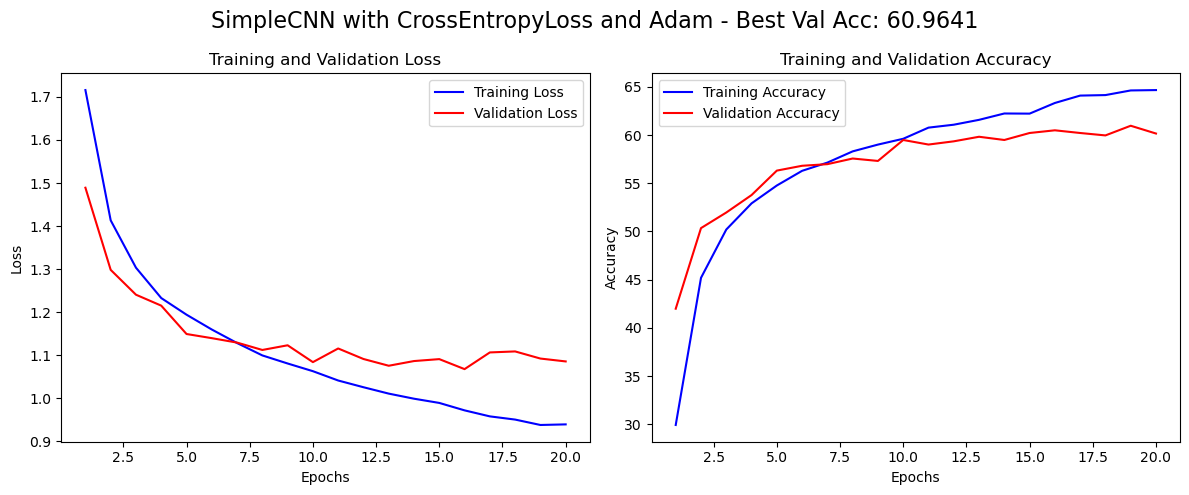

In [14]:
# Initialize model, loss function, and optimizer
model = m.SimpleCNN()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Train the model
t.train(model, train_loader, valid_loader, criterion, optimizer, num_epochs=20)

Validation: 100%|██████████| 57/57 [00:02<00:00, 26.69it/s, Val Loss=0.0231, Accuracy=42.7]


Epoch 1/20, Train Loss: 1.7291, Train Acc: 30.0080, Val Loss: 1.4557, Val Acc: 42.6860
Best model saved with accuracy: 42.6860 as 'bestmodels/CNNWithBatchNorm_CrossEntropyLoss_Adam_best_model.pth'


Validation: 100%|██████████| 57/57 [00:02<00:00, 27.38it/s, Val Loss=0.0209, Accuracy=48.9]


Epoch 2/20, Train Loss: 1.4696, Train Acc: 42.6591, Val Loss: 1.3165, Val Acc: 48.8716
Best model saved with accuracy: 48.8716 as 'bestmodels/CNNWithBatchNorm_CrossEntropyLoss_Adam_best_model.pth'


Validation: 100%|██████████| 57/57 [00:02<00:00, 27.80it/s, Val Loss=0.02, Accuracy=51.4]  


Epoch 3/20, Train Loss: 1.3767, Train Acc: 46.5638, Val Loss: 1.2567, Val Acc: 51.4071
Best model saved with accuracy: 51.4071 as 'bestmodels/CNNWithBatchNorm_CrossEntropyLoss_Adam_best_model.pth'


Validation: 100%|██████████| 57/57 [00:02<00:00, 27.95it/s, Val Loss=0.0192, Accuracy=53.4]


Epoch 4/20, Train Loss: 1.3300, Train Acc: 48.6851, Val Loss: 1.2063, Val Acc: 53.4411
Best model saved with accuracy: 53.4411 as 'bestmodels/CNNWithBatchNorm_CrossEntropyLoss_Adam_best_model.pth'


Validation: 100%|██████████| 57/57 [00:02<00:00, 27.83it/s, Val Loss=0.0194, Accuracy=53.1]


Epoch 5/20, Train Loss: 1.2949, Train Acc: 50.2003, Val Loss: 1.2205, Val Acc: 53.0510


Validation: 100%|██████████| 57/57 [00:02<00:00, 27.77it/s, Val Loss=0.0185, Accuracy=54.2]


Epoch 6/20, Train Loss: 1.2701, Train Acc: 51.1094, Val Loss: 1.1657, Val Acc: 54.1934
Best model saved with accuracy: 54.1934 as 'bestmodels/CNNWithBatchNorm_CrossEntropyLoss_Adam_best_model.pth'


Validation: 100%|██████████| 57/57 [00:02<00:00, 27.54it/s, Val Loss=0.0186, Accuracy=54.6]


Epoch 7/20, Train Loss: 1.2326, Train Acc: 53.0217, Val Loss: 1.1735, Val Acc: 54.5834
Best model saved with accuracy: 54.5834 as 'bestmodels/CNNWithBatchNorm_CrossEntropyLoss_Adam_best_model.pth'


Validation: 100%|██████████| 57/57 [00:02<00:00, 27.44it/s, Val Loss=0.0184, Accuracy=55.8]


Epoch 8/20, Train Loss: 1.2129, Train Acc: 54.0179, Val Loss: 1.1561, Val Acc: 55.7816
Best model saved with accuracy: 55.7816 as 'bestmodels/CNNWithBatchNorm_CrossEntropyLoss_Adam_best_model.pth'


Validation: 100%|██████████| 57/57 [00:02<00:00, 27.47it/s, Val Loss=0.018, Accuracy=56.2] 


Epoch 9/20, Train Loss: 1.1944, Train Acc: 54.6275, Val Loss: 1.1345, Val Acc: 56.2274
Best model saved with accuracy: 56.2274 as 'bestmodels/CNNWithBatchNorm_CrossEntropyLoss_Adam_best_model.pth'


Validation: 100%|██████████| 57/57 [00:02<00:00, 27.68it/s, Val Loss=0.0181, Accuracy=56.7]


Epoch 10/20, Train Loss: 1.1764, Train Acc: 55.6759, Val Loss: 1.1403, Val Acc: 56.7010
Best model saved with accuracy: 56.7010 as 'bestmodels/CNNWithBatchNorm_CrossEntropyLoss_Adam_best_model.pth'


Validation: 100%|██████████| 57/57 [00:02<00:00, 25.71it/s, Val Loss=0.0177, Accuracy=57.7]


Epoch 11/20, Train Loss: 1.1623, Train Acc: 56.1531, Val Loss: 1.1165, Val Acc: 57.7320
Best model saved with accuracy: 57.7320 as 'bestmodels/CNNWithBatchNorm_CrossEntropyLoss_Adam_best_model.pth'


Validation: 100%|██████████| 57/57 [00:02<00:00, 27.51it/s, Val Loss=0.0177, Accuracy=58.7]


Epoch 12/20, Train Loss: 1.1403, Train Acc: 56.6617, Val Loss: 1.1174, Val Acc: 58.7072
Best model saved with accuracy: 58.7072 as 'bestmodels/CNNWithBatchNorm_CrossEntropyLoss_Adam_best_model.pth'


Validation: 100%|██████████| 57/57 [00:02<00:00, 27.76it/s, Val Loss=0.0175, Accuracy=59.1]


Epoch 13/20, Train Loss: 1.1155, Train Acc: 57.8982, Val Loss: 1.1038, Val Acc: 59.0972
Best model saved with accuracy: 59.0972 as 'bestmodels/CNNWithBatchNorm_CrossEntropyLoss_Adam_best_model.pth'


Validation: 100%|██████████| 57/57 [00:02<00:00, 27.12it/s, Val Loss=0.0173, Accuracy=59]  


Epoch 14/20, Train Loss: 1.1054, Train Acc: 58.3928, Val Loss: 1.0924, Val Acc: 58.9579


Validation: 100%|██████████| 57/57 [00:02<00:00, 27.68it/s, Val Loss=0.0173, Accuracy=58.9]


Epoch 15/20, Train Loss: 1.0928, Train Acc: 58.6262, Val Loss: 1.0889, Val Acc: 58.8743


Validation: 100%|██████████| 57/57 [00:02<00:00, 27.78it/s, Val Loss=0.0171, Accuracy=58.8]


Epoch 16/20, Train Loss: 1.0793, Train Acc: 59.4970, Val Loss: 1.0790, Val Acc: 58.8465


Validation: 100%|██████████| 57/57 [00:02<00:00, 27.54it/s, Val Loss=0.017, Accuracy=59.9] 


Epoch 17/20, Train Loss: 1.0585, Train Acc: 60.2285, Val Loss: 1.0702, Val Acc: 59.8774
Best model saved with accuracy: 59.8774 as 'bestmodels/CNNWithBatchNorm_CrossEntropyLoss_Adam_best_model.pth'


Validation: 100%|██████████| 57/57 [00:02<00:00, 27.62it/s, Val Loss=0.0167, Accuracy=61.2]


Epoch 18/20, Train Loss: 1.0479, Train Acc: 60.6291, Val Loss: 1.0546, Val Acc: 61.1870
Best model saved with accuracy: 61.1870 as 'bestmodels/CNNWithBatchNorm_CrossEntropyLoss_Adam_best_model.pth'


Validation: 100%|██████████| 57/57 [00:02<00:00, 27.65it/s, Val Loss=0.0171, Accuracy=60.5]


Epoch 19/20, Train Loss: 1.0355, Train Acc: 61.0540, Val Loss: 1.0751, Val Acc: 60.4625


Validation: 100%|██████████| 57/57 [00:02<00:00, 27.39it/s, Val Loss=0.0167, Accuracy=60.9]


Epoch 20/20, Train Loss: 1.0221, Train Acc: 61.6880, Val Loss: 1.0516, Val Acc: 60.9362


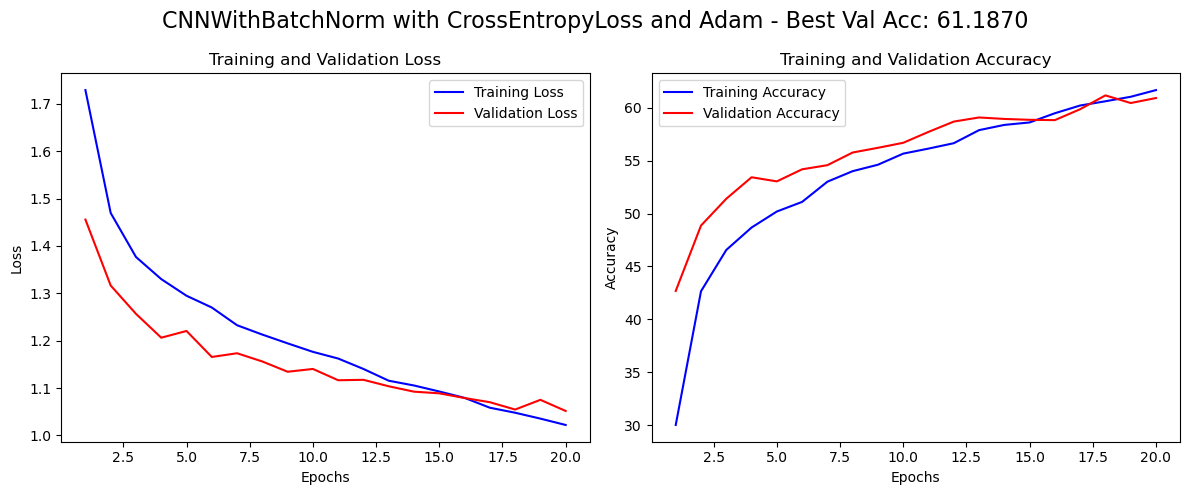

In [15]:
model = m.CNNWithBatchNorm()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Train the model
t.train(model, train_loader, valid_loader, criterion, optimizer, num_epochs=20)

Validation: 100%|██████████| 57/57 [00:01<00:00, 28.80it/s, Val Loss=0.0229, Accuracy=43.2]


Epoch 1/20, Train Loss: 1.6595, Train Acc: 33.6062, Val Loss: 1.4446, Val Acc: 43.2432
Best model saved with accuracy: 43.2432 as 'bestmodels/CNNWithLeakyReLU_CrossEntropyLoss_Adam_best_model.pth'


Validation: 100%|██████████| 57/57 [00:01<00:00, 28.78it/s, Val Loss=0.0198, Accuracy=52.7]


Epoch 2/20, Train Loss: 1.3759, Train Acc: 47.2500, Val Loss: 1.2442, Val Acc: 52.7445
Best model saved with accuracy: 52.7445 as 'bestmodels/CNNWithLeakyReLU_CrossEntropyLoss_Adam_best_model.pth'


Validation: 100%|██████████| 57/57 [00:02<00:00, 28.35it/s, Val Loss=0.0189, Accuracy=54]  


Epoch 3/20, Train Loss: 1.2512, Train Acc: 52.3564, Val Loss: 1.1896, Val Acc: 54.0262
Best model saved with accuracy: 54.0262 as 'bestmodels/CNNWithLeakyReLU_CrossEntropyLoss_Adam_best_model.pth'


Validation: 100%|██████████| 57/57 [00:02<00:00, 23.81it/s, Val Loss=0.0179, Accuracy=56.8]


Epoch 4/20, Train Loss: 1.1660, Train Acc: 55.9197, Val Loss: 1.1277, Val Acc: 56.8125
Best model saved with accuracy: 56.8125 as 'bestmodels/CNNWithLeakyReLU_CrossEntropyLoss_Adam_best_model.pth'


Validation: 100%|██████████| 57/57 [00:01<00:00, 28.98it/s, Val Loss=0.018, Accuracy=57.8] 


Epoch 5/20, Train Loss: 1.1150, Train Acc: 57.6857, Val Loss: 1.1335, Val Acc: 57.8155
Best model saved with accuracy: 57.8155 as 'bestmodels/CNNWithLeakyReLU_CrossEntropyLoss_Adam_best_model.pth'


Validation: 100%|██████████| 57/57 [00:01<00:00, 28.79it/s, Val Loss=0.0175, Accuracy=59.6]


Epoch 6/20, Train Loss: 1.0676, Train Acc: 59.7095, Val Loss: 1.1012, Val Acc: 59.5988
Best model saved with accuracy: 59.5988 as 'bestmodels/CNNWithLeakyReLU_CrossEntropyLoss_Adam_best_model.pth'


Validation: 100%|██████████| 57/57 [00:01<00:00, 28.67it/s, Val Loss=0.0175, Accuracy=59.3]


Epoch 7/20, Train Loss: 1.0285, Train Acc: 60.9321, Val Loss: 1.1009, Val Acc: 59.3480


Validation: 100%|██████████| 57/57 [00:02<00:00, 28.01it/s, Val Loss=0.017, Accuracy=60.7] 


Epoch 8/20, Train Loss: 0.9923, Train Acc: 62.5344, Val Loss: 1.0706, Val Acc: 60.7133
Best model saved with accuracy: 60.7133 as 'bestmodels/CNNWithLeakyReLU_CrossEntropyLoss_Adam_best_model.pth'


Validation: 100%|██████████| 57/57 [00:01<00:00, 28.68it/s, Val Loss=0.0176, Accuracy=60.9]


Epoch 9/20, Train Loss: 0.9528, Train Acc: 64.3283, Val Loss: 1.1111, Val Acc: 60.8526
Best model saved with accuracy: 60.8526 as 'bestmodels/CNNWithLeakyReLU_CrossEntropyLoss_Adam_best_model.pth'


Validation: 100%|██████████| 57/57 [00:01<00:00, 28.77it/s, Val Loss=0.0174, Accuracy=58.3]


Epoch 10/20, Train Loss: 0.9285, Train Acc: 65.2269, Val Loss: 1.0945, Val Acc: 58.3171


Validation: 100%|██████████| 57/57 [00:01<00:00, 28.95it/s, Val Loss=0.0171, Accuracy=61.2]


Epoch 11/20, Train Loss: 0.8987, Train Acc: 66.0141, Val Loss: 1.0747, Val Acc: 61.1870
Best model saved with accuracy: 61.1870 as 'bestmodels/CNNWithLeakyReLU_CrossEntropyLoss_Adam_best_model.pth'


Validation: 100%|██████████| 57/57 [00:01<00:00, 29.01it/s, Val Loss=0.0173, Accuracy=61.6]


Epoch 12/20, Train Loss: 0.8793, Train Acc: 67.1253, Val Loss: 1.0893, Val Acc: 61.5770
Best model saved with accuracy: 61.5770 as 'bestmodels/CNNWithLeakyReLU_CrossEntropyLoss_Adam_best_model.pth'


Validation: 100%|██████████| 57/57 [00:02<00:00, 28.49it/s, Val Loss=0.0174, Accuracy=61.2]


Epoch 13/20, Train Loss: 0.8415, Train Acc: 68.3584, Val Loss: 1.0949, Val Acc: 61.1870


Validation: 100%|██████████| 57/57 [00:01<00:00, 28.85it/s, Val Loss=0.0173, Accuracy=61.2]


Epoch 14/20, Train Loss: 0.8221, Train Acc: 69.2501, Val Loss: 1.0883, Val Acc: 61.2427


Validation: 100%|██████████| 57/57 [00:01<00:00, 28.84it/s, Val Loss=0.0176, Accuracy=60.6]


Epoch 15/20, Train Loss: 0.7959, Train Acc: 70.1035, Val Loss: 1.1102, Val Acc: 60.6297


Validation: 100%|██████████| 57/57 [00:01<00:00, 28.66it/s, Val Loss=0.0179, Accuracy=62.6]


Epoch 16/20, Train Loss: 0.7758, Train Acc: 71.1554, Val Loss: 1.1250, Val Acc: 62.5522
Best model saved with accuracy: 62.5522 as 'bestmodels/CNNWithLeakyReLU_CrossEntropyLoss_Adam_best_model.pth'


Validation: 100%|██████████| 57/57 [00:02<00:00, 27.74it/s, Val Loss=0.0184, Accuracy=62.6]


Epoch 17/20, Train Loss: 0.7542, Train Acc: 71.9530, Val Loss: 1.1568, Val Acc: 62.5801
Best model saved with accuracy: 62.5801 as 'bestmodels/CNNWithLeakyReLU_CrossEntropyLoss_Adam_best_model.pth'


Validation: 100%|██████████| 57/57 [00:01<00:00, 28.56it/s, Val Loss=0.0185, Accuracy=62.1]


Epoch 18/20, Train Loss: 0.7332, Train Acc: 72.6497, Val Loss: 1.1631, Val Acc: 62.1343


Validation: 100%|██████████| 57/57 [00:01<00:00, 29.24it/s, Val Loss=0.0185, Accuracy=61.9]


Epoch 19/20, Train Loss: 0.7229, Train Acc: 73.3603, Val Loss: 1.1669, Val Acc: 61.9114


Validation: 100%|██████████| 57/57 [00:01<00:00, 28.79it/s, Val Loss=0.0184, Accuracy=63]  


Epoch 20/20, Train Loss: 0.6924, Train Acc: 74.1997, Val Loss: 1.1605, Val Acc: 63.0259
Best model saved with accuracy: 63.0259 as 'bestmodels/CNNWithLeakyReLU_CrossEntropyLoss_Adam_best_model.pth'


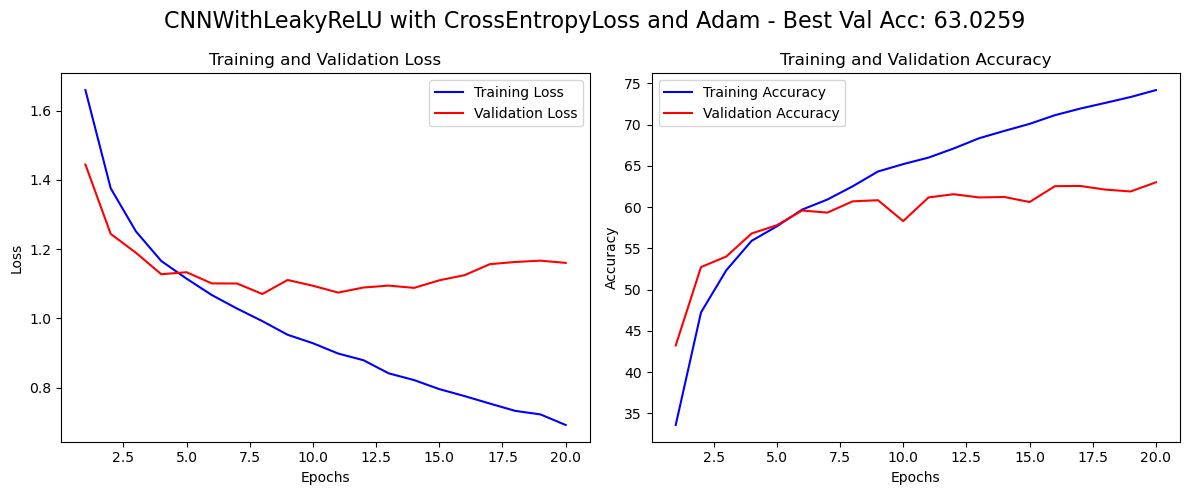

In [16]:
model = m.CNNWithLeakyReLU()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Train the model
t.train(model, train_loader, valid_loader, criterion, optimizer, num_epochs=20)

Validation: 100%|██████████| 57/57 [00:04<00:00, 11.93it/s, Val Loss=0.0287, Accuracy=24.9]


Epoch 1/20, Train Loss: 1.8191, Train Acc: 24.8911, Val Loss: 1.8084, Val Acc: 24.9373
Best model saved with accuracy: 24.9373 as 'bestmodels/CNNWithMoreConvLayers_CrossEntropyLoss_Adam_best_model.pth'


Validation: 100%|██████████| 57/57 [00:04<00:00, 11.85it/s, Val Loss=0.0288, Accuracy=24.9]


Epoch 2/20, Train Loss: 1.8143, Train Acc: 25.1315, Val Loss: 1.8127, Val Acc: 24.9373


Validation: 100%|██████████| 57/57 [00:04<00:00, 11.89it/s, Val Loss=0.0287, Accuracy=24.9]


Epoch 3/20, Train Loss: 1.8140, Train Acc: 25.1141, Val Loss: 1.8099, Val Acc: 24.9373


Validation: 100%|██████████| 57/57 [00:04<00:00, 11.91it/s, Val Loss=0.0288, Accuracy=24.9]


Epoch 4/20, Train Loss: 1.8122, Train Acc: 25.1315, Val Loss: 1.8113, Val Acc: 24.9373


Validation: 100%|██████████| 57/57 [00:04<00:00, 11.85it/s, Val Loss=0.0288, Accuracy=24.9]


Epoch 5/20, Train Loss: 1.8120, Train Acc: 25.1315, Val Loss: 1.8105, Val Acc: 24.9373


Validation: 100%|██████████| 57/57 [00:04<00:00, 11.84it/s, Val Loss=0.0287, Accuracy=24.9]


Epoch 6/20, Train Loss: 1.8115, Train Acc: 25.1315, Val Loss: 1.8091, Val Acc: 24.9373


Validation: 100%|██████████| 57/57 [00:04<00:00, 11.91it/s, Val Loss=0.0287, Accuracy=24.9]


Epoch 7/20, Train Loss: 1.8118, Train Acc: 25.1315, Val Loss: 1.8091, Val Acc: 24.9373


Validation: 100%|██████████| 57/57 [00:04<00:00, 11.90it/s, Val Loss=0.0287, Accuracy=24.9]


Epoch 8/20, Train Loss: 1.8119, Train Acc: 25.1315, Val Loss: 1.8087, Val Acc: 24.9373


Validation: 100%|██████████| 57/57 [00:04<00:00, 11.99it/s, Val Loss=0.0288, Accuracy=24.9]


Epoch 9/20, Train Loss: 1.8111, Train Acc: 25.1315, Val Loss: 1.8109, Val Acc: 24.9373


Validation: 100%|██████████| 57/57 [00:04<00:00, 12.00it/s, Val Loss=0.0287, Accuracy=24.9]


Epoch 10/20, Train Loss: 1.8109, Train Acc: 25.1315, Val Loss: 1.8098, Val Acc: 24.9373


Validation: 100%|██████████| 57/57 [00:04<00:00, 11.72it/s, Val Loss=0.0288, Accuracy=24.9]


Epoch 11/20, Train Loss: 1.8112, Train Acc: 25.1315, Val Loss: 1.8103, Val Acc: 24.9373


Validation: 100%|██████████| 57/57 [00:04<00:00, 12.04it/s, Val Loss=0.0287, Accuracy=24.9]


Epoch 12/20, Train Loss: 1.8111, Train Acc: 25.1315, Val Loss: 1.8092, Val Acc: 24.9373


Validation: 100%|██████████| 57/57 [00:04<00:00, 11.97it/s, Val Loss=0.0287, Accuracy=24.9]


Epoch 13/20, Train Loss: 1.8113, Train Acc: 25.1315, Val Loss: 1.8094, Val Acc: 24.9373


Validation: 100%|██████████| 57/57 [00:04<00:00, 12.08it/s, Val Loss=0.0288, Accuracy=24.9]


Epoch 14/20, Train Loss: 1.8115, Train Acc: 25.1315, Val Loss: 1.8104, Val Acc: 24.9373


Validation: 100%|██████████| 57/57 [00:04<00:00, 11.86it/s, Val Loss=0.0287, Accuracy=24.9]


Epoch 15/20, Train Loss: 1.8107, Train Acc: 25.1315, Val Loss: 1.8096, Val Acc: 24.9373


Validation: 100%|██████████| 57/57 [00:04<00:00, 11.80it/s, Val Loss=0.0287, Accuracy=24.9]


Epoch 16/20, Train Loss: 1.8113, Train Acc: 25.1315, Val Loss: 1.8093, Val Acc: 24.9373


Validation: 100%|██████████| 57/57 [00:04<00:00, 11.98it/s, Val Loss=0.0288, Accuracy=24.9]


Epoch 17/20, Train Loss: 1.8110, Train Acc: 25.1315, Val Loss: 1.8104, Val Acc: 24.9373


Validation: 100%|██████████| 57/57 [00:04<00:00, 12.03it/s, Val Loss=0.0288, Accuracy=24.9]


Epoch 18/20, Train Loss: 1.8107, Train Acc: 25.1315, Val Loss: 1.8108, Val Acc: 24.9373


Validation: 100%|██████████| 57/57 [00:04<00:00, 11.98it/s, Val Loss=0.0287, Accuracy=24.9]


Epoch 19/20, Train Loss: 1.8112, Train Acc: 25.1315, Val Loss: 1.8100, Val Acc: 24.9373


Validation: 100%|██████████| 57/57 [00:04<00:00, 11.82it/s, Val Loss=0.0288, Accuracy=24.9]


Epoch 20/20, Train Loss: 1.8108, Train Acc: 25.1315, Val Loss: 1.8114, Val Acc: 24.9373


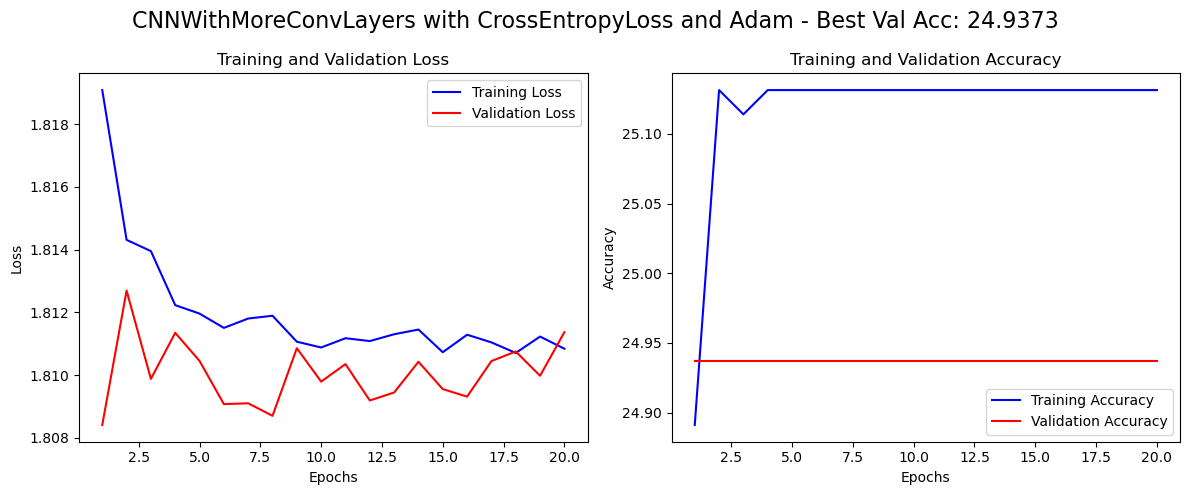

In [17]:
model = m.CNNWithMoreConvLayers()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Train the model
t.train(model, train_loader, valid_loader, criterion, optimizer, num_epochs=20)

Validation: 100%|██████████| 57/57 [00:04<00:00, 12.98it/s, Val Loss=0.0285, Accuracy=24.9]


Epoch 1/20, Train Loss: 1.8158, Train Acc: 24.8528, Val Loss: 1.7915, Val Acc: 24.9373
Best model saved with accuracy: 24.9373 as 'bestmodels/CNNWithSmallerKernels_CrossEntropyLoss_Adam_best_model.pth'


Validation: 100%|██████████| 57/57 [00:04<00:00, 12.91it/s, Val Loss=0.027, Accuracy=30.5] 


Epoch 2/20, Train Loss: 1.7779, Train Acc: 26.1590, Val Loss: 1.7014, Val Acc: 30.4820
Best model saved with accuracy: 30.4820 as 'bestmodels/CNNWithSmallerKernels_CrossEntropyLoss_Adam_best_model.pth'


Validation: 100%|██████████| 57/57 [00:04<00:00, 12.80it/s, Val Loss=0.0246, Accuracy=39.5]


Epoch 3/20, Train Loss: 1.6156, Train Acc: 36.5286, Val Loss: 1.5468, Val Acc: 39.5096
Best model saved with accuracy: 39.5096 as 'bestmodels/CNNWithSmallerKernels_CrossEntropyLoss_Adam_best_model.pth'


Validation: 100%|██████████| 57/57 [00:04<00:00, 12.78it/s, Val Loss=0.023, Accuracy=43.7] 


Epoch 4/20, Train Loss: 1.5250, Train Acc: 40.7607, Val Loss: 1.4504, Val Acc: 43.7169
Best model saved with accuracy: 43.7169 as 'bestmodels/CNNWithSmallerKernels_CrossEntropyLoss_Adam_best_model.pth'


Validation: 100%|██████████| 57/57 [00:04<00:00, 12.87it/s, Val Loss=0.022, Accuracy=46.1] 


Epoch 5/20, Train Loss: 1.4659, Train Acc: 43.0632, Val Loss: 1.3854, Val Acc: 46.1131
Best model saved with accuracy: 46.1131 as 'bestmodels/CNNWithSmallerKernels_CrossEntropyLoss_Adam_best_model.pth'


Validation: 100%|██████████| 57/57 [00:04<00:00, 12.81it/s, Val Loss=0.0213, Accuracy=48.4]


Epoch 6/20, Train Loss: 1.4129, Train Acc: 45.4701, Val Loss: 1.3388, Val Acc: 48.3979
Best model saved with accuracy: 48.3979 as 'bestmodels/CNNWithSmallerKernels_CrossEntropyLoss_Adam_best_model.pth'


Validation: 100%|██████████| 57/57 [00:04<00:00, 12.83it/s, Val Loss=0.0208, Accuracy=49.4]


Epoch 7/20, Train Loss: 1.3702, Train Acc: 46.9922, Val Loss: 1.3067, Val Acc: 49.4009
Best model saved with accuracy: 49.4009 as 'bestmodels/CNNWithSmallerKernels_CrossEntropyLoss_Adam_best_model.pth'


Validation: 100%|██████████| 57/57 [00:04<00:00, 12.84it/s, Val Loss=0.0207, Accuracy=49]  


Epoch 8/20, Train Loss: 1.3268, Train Acc: 48.7756, Val Loss: 1.3015, Val Acc: 48.9830


Validation: 100%|██████████| 57/57 [00:04<00:00, 12.83it/s, Val Loss=0.0204, Accuracy=50.4]


Epoch 9/20, Train Loss: 1.3021, Train Acc: 50.0052, Val Loss: 1.2830, Val Acc: 50.3761
Best model saved with accuracy: 50.3761 as 'bestmodels/CNNWithSmallerKernels_CrossEntropyLoss_Adam_best_model.pth'


Validation: 100%|██████████| 57/57 [00:04<00:00, 12.88it/s, Val Loss=0.0195, Accuracy=51.9]


Epoch 10/20, Train Loss: 1.2730, Train Acc: 51.3393, Val Loss: 1.2295, Val Acc: 51.8529
Best model saved with accuracy: 51.8529 as 'bestmodels/CNNWithSmallerKernels_CrossEntropyLoss_Adam_best_model.pth'


Validation: 100%|██████████| 57/57 [00:04<00:00, 12.93it/s, Val Loss=0.0196, Accuracy=52.6]


Epoch 11/20, Train Loss: 1.2562, Train Acc: 51.7468, Val Loss: 1.2335, Val Acc: 52.6330
Best model saved with accuracy: 52.6330 as 'bestmodels/CNNWithSmallerKernels_CrossEntropyLoss_Adam_best_model.pth'


Validation: 100%|██████████| 57/57 [00:04<00:00, 12.80it/s, Val Loss=0.0193, Accuracy=52.4]


Epoch 12/20, Train Loss: 1.2330, Train Acc: 52.7361, Val Loss: 1.2167, Val Acc: 52.4101


Validation: 100%|██████████| 57/57 [00:04<00:00, 12.92it/s, Val Loss=0.0189, Accuracy=53.3]


Epoch 13/20, Train Loss: 1.2200, Train Acc: 53.3178, Val Loss: 1.1892, Val Acc: 53.3296
Best model saved with accuracy: 53.3296 as 'bestmodels/CNNWithSmallerKernels_CrossEntropyLoss_Adam_best_model.pth'


Validation: 100%|██████████| 57/57 [00:04<00:00, 12.79it/s, Val Loss=0.019, Accuracy=54.1] 


Epoch 14/20, Train Loss: 1.1935, Train Acc: 54.3244, Val Loss: 1.1949, Val Acc: 54.0541
Best model saved with accuracy: 54.0541 as 'bestmodels/CNNWithSmallerKernels_CrossEntropyLoss_Adam_best_model.pth'


Validation: 100%|██████████| 57/57 [00:04<00:00, 12.77it/s, Val Loss=0.0187, Accuracy=54.4]


Epoch 15/20, Train Loss: 1.1800, Train Acc: 54.8957, Val Loss: 1.1781, Val Acc: 54.3605
Best model saved with accuracy: 54.3605 as 'bestmodels/CNNWithSmallerKernels_CrossEntropyLoss_Adam_best_model.pth'


Validation: 100%|██████████| 57/57 [00:04<00:00, 12.77it/s, Val Loss=0.0183, Accuracy=55.1]


Epoch 16/20, Train Loss: 1.1690, Train Acc: 55.7491, Val Loss: 1.1541, Val Acc: 55.0850
Best model saved with accuracy: 55.0850 as 'bestmodels/CNNWithSmallerKernels_CrossEntropyLoss_Adam_best_model.pth'


Validation: 100%|██████████| 57/57 [00:04<00:00, 12.83it/s, Val Loss=0.019, Accuracy=53.9] 


Epoch 17/20, Train Loss: 1.1545, Train Acc: 55.9720, Val Loss: 1.1985, Val Acc: 53.8869


Validation: 100%|██████████| 57/57 [00:04<00:00, 12.85it/s, Val Loss=0.0182, Accuracy=56.7]


Epoch 18/20, Train Loss: 1.1522, Train Acc: 56.0835, Val Loss: 1.1439, Val Acc: 56.7289
Best model saved with accuracy: 56.7289 as 'bestmodels/CNNWithSmallerKernels_CrossEntropyLoss_Adam_best_model.pth'


Validation: 100%|██████████| 57/57 [00:04<00:00, 12.94it/s, Val Loss=0.0183, Accuracy=55.8]


Epoch 19/20, Train Loss: 1.1350, Train Acc: 57.1180, Val Loss: 1.1554, Val Acc: 55.8094


Validation: 100%|██████████| 57/57 [00:04<00:00, 12.93it/s, Val Loss=0.0181, Accuracy=56.9]


Epoch 20/20, Train Loss: 1.1252, Train Acc: 57.1006, Val Loss: 1.1409, Val Acc: 56.9239
Best model saved with accuracy: 56.9239 as 'bestmodels/CNNWithSmallerKernels_CrossEntropyLoss_Adam_best_model.pth'


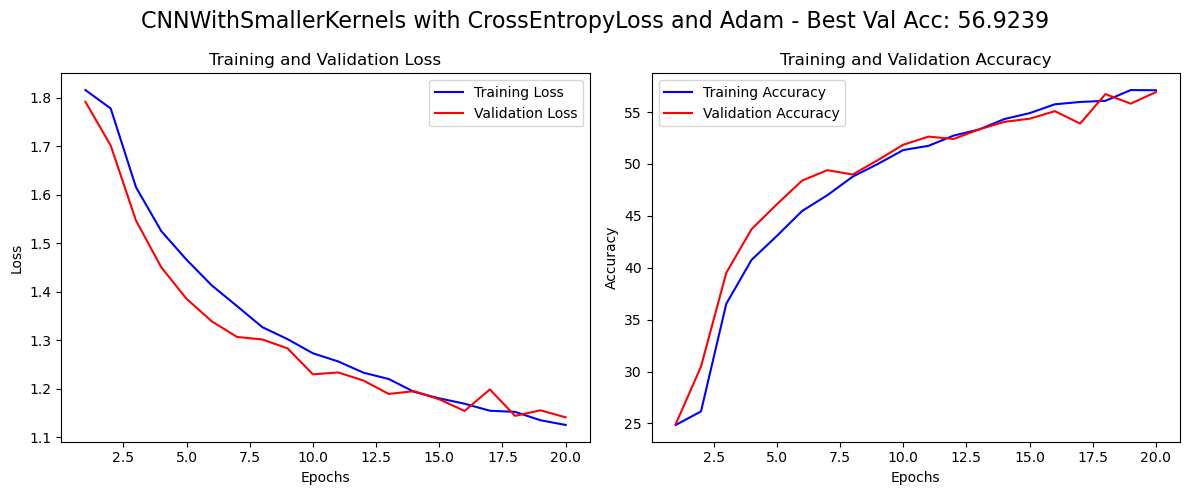

In [18]:
model = m.CNNWithSmallerKernels()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Train the model
t.train(model, train_loader, valid_loader, criterion, optimizer, num_epochs=20)

Validation: 100%|██████████| 57/57 [00:04<00:00, 12.89it/s, Val Loss=0.0283, Accuracy=24.9]


Epoch 1/20, Train Loss: 1.8087, Train Acc: 24.8110, Val Loss: 1.7820, Val Acc: 24.9094
Best model saved with accuracy: 24.9094 as 'bestmodels/CNNWithSmallerKernels_CrossEntropyLoss_Adam_best_model.pth'


Validation: 100%|██████████| 57/57 [00:04<00:00, 12.73it/s, Val Loss=0.0261, Accuracy=35.8]


Epoch 2/20, Train Loss: 1.7532, Train Acc: 27.5802, Val Loss: 1.6410, Val Acc: 35.7760
Best model saved with accuracy: 35.7760 as 'bestmodels/CNNWithSmallerKernels_CrossEntropyLoss_Adam_best_model.pth'


Validation: 100%|██████████| 57/57 [00:04<00:00, 12.92it/s, Val Loss=0.0242, Accuracy=40.8]


Epoch 3/20, Train Loss: 1.5930, Train Acc: 37.4586, Val Loss: 1.5221, Val Acc: 40.8470
Best model saved with accuracy: 40.8470 as 'bestmodels/CNNWithSmallerKernels_CrossEntropyLoss_Adam_best_model.pth'


Validation: 100%|██████████| 57/57 [00:04<00:00, 12.82it/s, Val Loss=0.0228, Accuracy=44.5]


Epoch 4/20, Train Loss: 1.5013, Train Acc: 41.6072, Val Loss: 1.4363, Val Acc: 44.4971
Best model saved with accuracy: 44.4971 as 'bestmodels/CNNWithSmallerKernels_CrossEntropyLoss_Adam_best_model.pth'


Validation: 100%|██████████| 57/57 [00:04<00:00, 12.90it/s, Val Loss=0.0219, Accuracy=46.1]


Epoch 5/20, Train Loss: 1.4378, Train Acc: 44.6411, Val Loss: 1.3812, Val Acc: 46.1131
Best model saved with accuracy: 46.1131 as 'bestmodels/CNNWithSmallerKernels_CrossEntropyLoss_Adam_best_model.pth'


Validation: 100%|██████████| 57/57 [00:04<00:00, 12.76it/s, Val Loss=0.0208, Accuracy=49.5]


Epoch 6/20, Train Loss: 1.3862, Train Acc: 46.5951, Val Loss: 1.3099, Val Acc: 49.4845
Best model saved with accuracy: 49.4845 as 'bestmodels/CNNWithSmallerKernels_CrossEntropyLoss_Adam_best_model.pth'


Validation: 100%|██████████| 57/57 [00:04<00:00, 12.78it/s, Val Loss=0.0203, Accuracy=50.7]


Epoch 7/20, Train Loss: 1.3423, Train Acc: 48.4169, Val Loss: 1.2779, Val Acc: 50.6548
Best model saved with accuracy: 50.6548 as 'bestmodels/CNNWithSmallerKernels_CrossEntropyLoss_Adam_best_model.pth'


Validation: 100%|██████████| 57/57 [00:04<00:00, 12.86it/s, Val Loss=0.0198, Accuracy=51.4]


Epoch 8/20, Train Loss: 1.3084, Train Acc: 49.8450, Val Loss: 1.2443, Val Acc: 51.3792
Best model saved with accuracy: 51.3792 as 'bestmodels/CNNWithSmallerKernels_CrossEntropyLoss_Adam_best_model.pth'


Validation: 100%|██████████| 57/57 [00:04<00:00, 12.78it/s, Val Loss=0.0195, Accuracy=52.3]


Epoch 9/20, Train Loss: 1.2725, Train Acc: 51.1721, Val Loss: 1.2308, Val Acc: 52.2708
Best model saved with accuracy: 52.2708 as 'bestmodels/CNNWithSmallerKernels_CrossEntropyLoss_Adam_best_model.pth'


Validation: 100%|██████████| 57/57 [00:04<00:00, 12.78it/s, Val Loss=0.0192, Accuracy=53.1]


Epoch 10/20, Train Loss: 1.2437, Train Acc: 52.9451, Val Loss: 1.2102, Val Acc: 53.0789
Best model saved with accuracy: 53.0789 as 'bestmodels/CNNWithSmallerKernels_CrossEntropyLoss_Adam_best_model.pth'


Validation: 100%|██████████| 57/57 [00:04<00:00, 12.51it/s, Val Loss=0.0189, Accuracy=53.7]


Epoch 11/20, Train Loss: 1.2261, Train Acc: 53.3631, Val Loss: 1.1885, Val Acc: 53.7476
Best model saved with accuracy: 53.7476 as 'bestmodels/CNNWithSmallerKernels_CrossEntropyLoss_Adam_best_model.pth'


Validation: 100%|██████████| 57/57 [00:04<00:00, 12.86it/s, Val Loss=0.0187, Accuracy=55.5]


Epoch 12/20, Train Loss: 1.2015, Train Acc: 54.5439, Val Loss: 1.1746, Val Acc: 55.5308
Best model saved with accuracy: 55.5308 as 'bestmodels/CNNWithSmallerKernels_CrossEntropyLoss_Adam_best_model.pth'


Validation: 100%|██████████| 57/57 [00:04<00:00, 12.84it/s, Val Loss=0.0185, Accuracy=55.4]


Epoch 13/20, Train Loss: 1.1831, Train Acc: 54.8156, Val Loss: 1.1656, Val Acc: 55.3636


Validation: 100%|██████████| 57/57 [00:04<00:00, 12.86it/s, Val Loss=0.0191, Accuracy=54.6]


Epoch 14/20, Train Loss: 1.1733, Train Acc: 55.3520, Val Loss: 1.2030, Val Acc: 54.5834


Validation: 100%|██████████| 57/57 [00:04<00:00, 12.64it/s, Val Loss=0.0181, Accuracy=56.3]


Epoch 15/20, Train Loss: 1.1549, Train Acc: 56.1253, Val Loss: 1.1374, Val Acc: 56.3388
Best model saved with accuracy: 56.3388 as 'bestmodels/CNNWithSmallerKernels_CrossEntropyLoss_Adam_best_model.pth'


Validation: 100%|██████████| 57/57 [00:04<00:00, 12.80it/s, Val Loss=0.0179, Accuracy=56.9]


Epoch 16/20, Train Loss: 1.1400, Train Acc: 56.6965, Val Loss: 1.1299, Val Acc: 56.8682
Best model saved with accuracy: 56.8682 as 'bestmodels/CNNWithSmallerKernels_CrossEntropyLoss_Adam_best_model.pth'


Validation: 100%|██████████| 57/57 [00:04<00:00, 12.76it/s, Val Loss=0.0181, Accuracy=57.1]


Epoch 17/20, Train Loss: 1.1314, Train Acc: 56.9334, Val Loss: 1.1390, Val Acc: 57.1468
Best model saved with accuracy: 57.1468 as 'bestmodels/CNNWithSmallerKernels_CrossEntropyLoss_Adam_best_model.pth'


Validation: 100%|██████████| 57/57 [00:04<00:00, 12.80it/s, Val Loss=0.0179, Accuracy=57.4]


Epoch 18/20, Train Loss: 1.1159, Train Acc: 57.3862, Val Loss: 1.1275, Val Acc: 57.3697
Best model saved with accuracy: 57.3697 as 'bestmodels/CNNWithSmallerKernels_CrossEntropyLoss_Adam_best_model.pth'


Validation: 100%|██████████| 57/57 [00:04<00:00, 12.77it/s, Val Loss=0.0181, Accuracy=57.2]


Epoch 19/20, Train Loss: 1.1086, Train Acc: 57.6370, Val Loss: 1.1425, Val Acc: 57.2304


Validation: 100%|██████████| 57/57 [00:04<00:00, 12.84it/s, Val Loss=0.0181, Accuracy=57.1]


Epoch 20/20, Train Loss: 1.1051, Train Acc: 58.2918, Val Loss: 1.1419, Val Acc: 57.0911


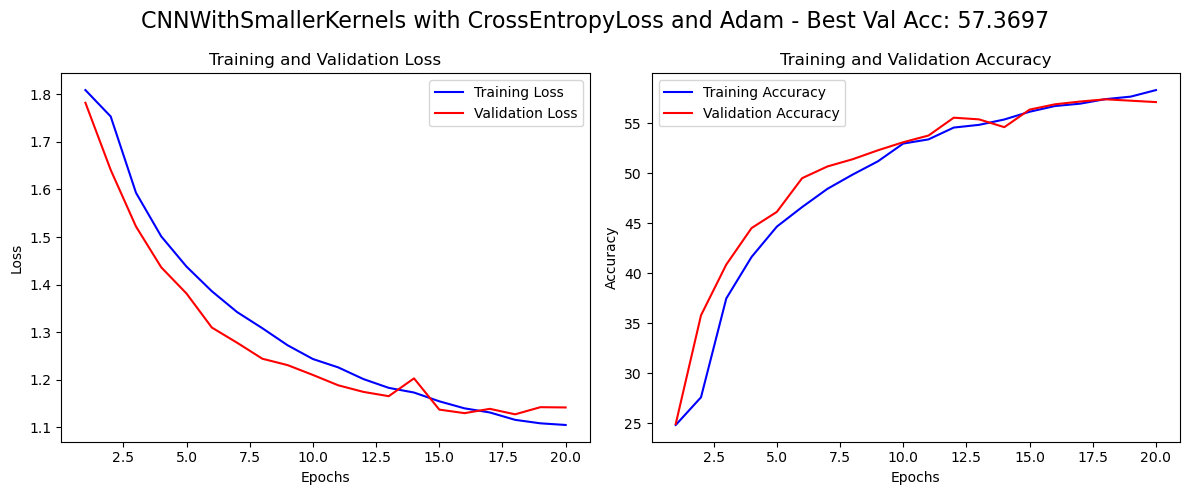

In [19]:
model = m.CNNWithSmallerKernels()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Train the model
t.train(model, train_loader, valid_loader, criterion, optimizer, num_epochs=20)

Validation: 100%|██████████| 57/57 [00:04<00:00, 11.47it/s, Val Loss=0.024, Accuracy=41.5] 


Epoch 1/20, Train Loss: 1.7055, Train Acc: 31.8715, Val Loss: 1.5121, Val Acc: 41.4879
Best model saved with accuracy: 41.4879 as 'bestmodels/ImprovedCNN_CrossEntropyLoss_Adam_best_model.pth'


Validation: 100%|██████████| 57/57 [00:04<00:00, 11.52it/s, Val Loss=0.0221, Accuracy=47.2]


Epoch 2/20, Train Loss: 1.3303, Train Acc: 48.8000, Val Loss: 1.3945, Val Acc: 47.1719
Best model saved with accuracy: 47.1719 as 'bestmodels/ImprovedCNN_CrossEntropyLoss_Adam_best_model.pth'


Validation: 100%|██████████| 57/57 [00:04<00:00, 11.55it/s, Val Loss=0.0193, Accuracy=54.4]


Epoch 3/20, Train Loss: 1.2161, Train Acc: 53.6731, Val Loss: 1.2133, Val Acc: 54.3884
Best model saved with accuracy: 54.3884 as 'bestmodels/ImprovedCNN_CrossEntropyLoss_Adam_best_model.pth'


Validation: 100%|██████████| 57/57 [00:05<00:00, 11.30it/s, Val Loss=0.0191, Accuracy=52.9]


Epoch 4/20, Train Loss: 1.1471, Train Acc: 56.5398, Val Loss: 1.2017, Val Acc: 52.8838


Validation: 100%|██████████| 57/57 [00:04<00:00, 11.55it/s, Val Loss=0.0178, Accuracy=57.7]


Epoch 5/20, Train Loss: 1.1017, Train Acc: 58.1629, Val Loss: 1.1204, Val Acc: 57.7041
Best model saved with accuracy: 57.7041 as 'bestmodels/ImprovedCNN_CrossEntropyLoss_Adam_best_model.pth'


Validation: 100%|██████████| 57/57 [00:04<00:00, 11.50it/s, Val Loss=0.0169, Accuracy=59.7]


Epoch 6/20, Train Loss: 1.0664, Train Acc: 59.5771, Val Loss: 1.0643, Val Acc: 59.6545
Best model saved with accuracy: 59.6545 as 'bestmodels/ImprovedCNN_CrossEntropyLoss_Adam_best_model.pth'


Validation: 100%|██████████| 57/57 [00:05<00:00, 11.21it/s, Val Loss=0.0168, Accuracy=60.5]


Epoch 7/20, Train Loss: 1.0338, Train Acc: 60.8311, Val Loss: 1.0579, Val Acc: 60.4625
Best model saved with accuracy: 60.4625 as 'bestmodels/ImprovedCNN_CrossEntropyLoss_Adam_best_model.pth'


Validation: 100%|██████████| 57/57 [00:04<00:00, 11.48it/s, Val Loss=0.0169, Accuracy=60]  


Epoch 8/20, Train Loss: 1.0056, Train Acc: 61.9980, Val Loss: 1.0650, Val Acc: 59.9889


Validation: 100%|██████████| 57/57 [00:04<00:00, 11.41it/s, Val Loss=0.0163, Accuracy=62.6]


Epoch 9/20, Train Loss: 0.9816, Train Acc: 63.0011, Val Loss: 1.0239, Val Acc: 62.6358
Best model saved with accuracy: 62.6358 as 'bestmodels/ImprovedCNN_CrossEntropyLoss_Adam_best_model.pth'


Validation: 100%|██████████| 57/57 [00:04<00:00, 11.40it/s, Val Loss=0.0166, Accuracy=60.5]


Epoch 10/20, Train Loss: 0.9571, Train Acc: 63.7849, Val Loss: 1.0462, Val Acc: 60.5461


Validation: 100%|██████████| 57/57 [00:04<00:00, 11.54it/s, Val Loss=0.0159, Accuracy=62.6]


Epoch 11/20, Train Loss: 0.9361, Train Acc: 64.5895, Val Loss: 1.0013, Val Acc: 62.6080


Validation: 100%|██████████| 57/57 [00:04<00:00, 11.55it/s, Val Loss=0.0164, Accuracy=62.2]


Epoch 12/20, Train Loss: 0.9131, Train Acc: 65.4150, Val Loss: 1.0329, Val Acc: 62.2458


Validation: 100%|██████████| 57/57 [00:05<00:00, 11.31it/s, Val Loss=0.0154, Accuracy=63.8]


Epoch 13/20, Train Loss: 0.8946, Train Acc: 66.3450, Val Loss: 0.9699, Val Acc: 63.8339
Best model saved with accuracy: 63.8339 as 'bestmodels/ImprovedCNN_CrossEntropyLoss_Adam_best_model.pth'


Validation: 100%|██████████| 57/57 [00:04<00:00, 11.42it/s, Val Loss=0.0167, Accuracy=60.6]


Epoch 14/20, Train Loss: 0.8671, Train Acc: 67.5746, Val Loss: 1.0509, Val Acc: 60.5740


Validation: 100%|██████████| 57/57 [00:05<00:00, 11.35it/s, Val Loss=0.0154, Accuracy=64.4]


Epoch 15/20, Train Loss: 0.8487, Train Acc: 68.0274, Val Loss: 0.9714, Val Acc: 64.3633
Best model saved with accuracy: 64.3633 as 'bestmodels/ImprovedCNN_CrossEntropyLoss_Adam_best_model.pth'


Validation: 100%|██████████| 57/57 [00:05<00:00, 11.39it/s, Val Loss=0.0156, Accuracy=64.4]


Epoch 16/20, Train Loss: 0.8324, Train Acc: 68.8704, Val Loss: 0.9849, Val Acc: 64.4191
Best model saved with accuracy: 64.4191 as 'bestmodels/ImprovedCNN_CrossEntropyLoss_Adam_best_model.pth'


Validation: 100%|██████████| 57/57 [00:05<00:00, 11.17it/s, Val Loss=0.0161, Accuracy=64.3]


Epoch 17/20, Train Loss: 0.8111, Train Acc: 69.5043, Val Loss: 1.0116, Val Acc: 64.2519


Validation: 100%|██████████| 57/57 [00:05<00:00, 11.24it/s, Val Loss=0.0164, Accuracy=64.3]


Epoch 18/20, Train Loss: 0.7945, Train Acc: 70.0582, Val Loss: 1.0357, Val Acc: 64.2797


Validation: 100%|██████████| 57/57 [00:05<00:00, 11.25it/s, Val Loss=0.0174, Accuracy=61.6]


Epoch 19/20, Train Loss: 0.7684, Train Acc: 71.2320, Val Loss: 1.0977, Val Acc: 61.5770


Validation: 100%|██████████| 57/57 [00:04<00:00, 11.49it/s, Val Loss=0.0157, Accuracy=65.2]


Epoch 20/20, Train Loss: 0.7502, Train Acc: 72.0366, Val Loss: 0.9901, Val Acc: 65.1992
Best model saved with accuracy: 65.1992 as 'bestmodels/ImprovedCNN_CrossEntropyLoss_Adam_best_model.pth'


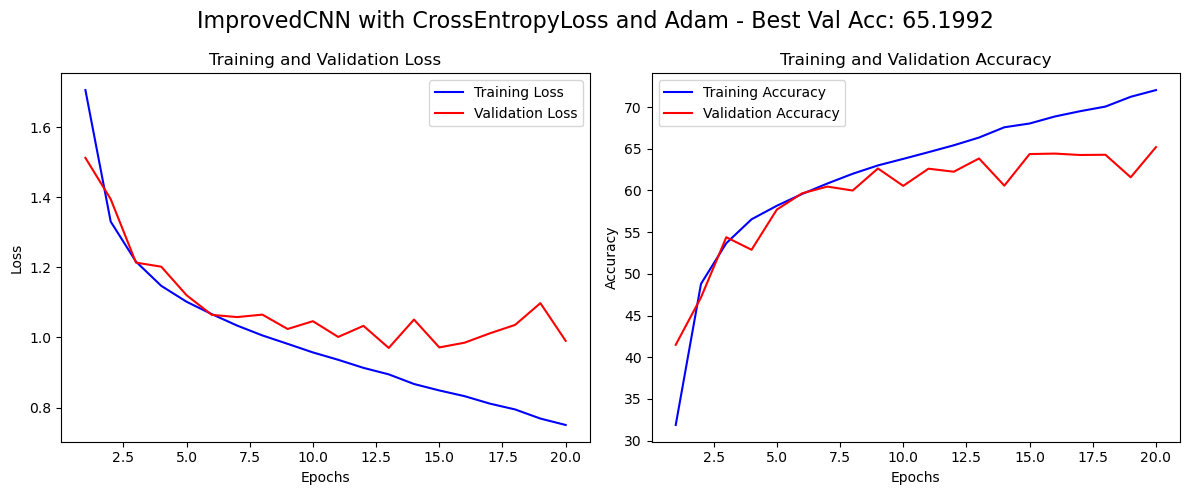

In [20]:
model = m.ImprovedCNN()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Train the model
t.train(model, train_loader, valid_loader, criterion, optimizer, num_epochs=20)

Evaluating: 100%|██████████| 57/57 [00:05<00:00, 11.39it/s]

Test Loss: 0.9523, Test Accuracy: 66.2023%


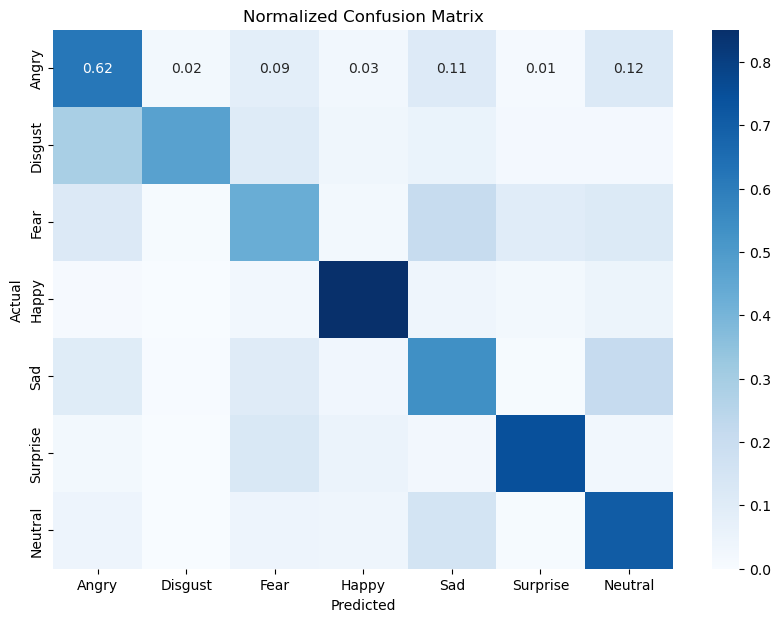

Classification Report:

              precision    recall  f1-score   support

       Angry       0.62      0.62      0.62       491
     Disgust       0.57      0.47      0.51        55
        Fear       0.51      0.43      0.47       528
       Happy       0.89      0.85      0.87       879
         Sad       0.51      0.54      0.52       594
    Surprise       0.78      0.75      0.76       416
     Neutral       0.59      0.71      0.64       626

    accuracy                           0.66      3589
   macro avg       0.64      0.62      0.63      3589
weighted avg       0.67      0.66      0.66      3589



In [21]:
# Evaluate the model

eval.evaluate_model(model, test_loader, criterion)

Evaluating: 100%|██████████| 57/57 [00:01<00:00, 29.46it/s]


Test Loss: 1.3691, Test Accuracy: 48.3979%


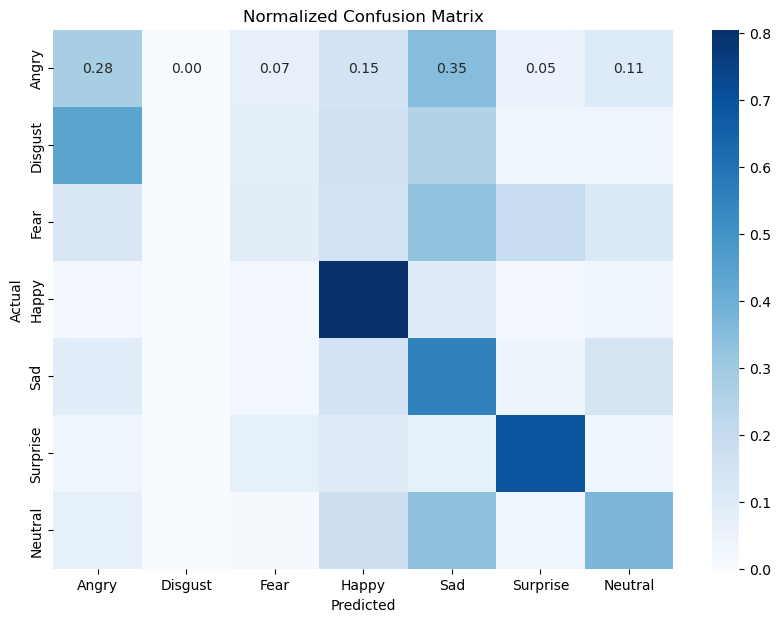

Classification Report:

              precision    recall  f1-score   support

       Angry       0.38      0.28      0.32       491
     Disgust       0.00      0.00      0.00        55
        Fear       0.30      0.09      0.13       528
       Happy       0.64      0.81      0.71       879
         Sad       0.32      0.55      0.41       594
    Surprise       0.59      0.69      0.64       416
     Neutral       0.50      0.37      0.42       626

    accuracy                           0.48      3589
   macro avg       0.39      0.40      0.38      3589
weighted avg       0.46      0.48      0.45      3589



In [22]:
# use saved model
criterion = torch.nn.CrossEntropyLoss()
model = m.load_model(m.SimpleCNN(), 'bestmodels/SimpleCNN_best_model.pth')
eval.evaluate_model(model, test_loader, criterion)